# Project:  Boston AirBNB Data Analysis
Adel Abu Hashim - July 2021
 
 
 <img src="boston.png" alt="boston">

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Data Science requires**
- Curiosity.
- Data.
- Code.
- Communication.
- Deep Learning and Machine Learning.

In this project I'm going to apply **CRISP-DM**(CRoss Industry Standard Process)  which contains 6 steps:

1. Business Undestanding.
2. Data Understanding.
3. Preparing Data.
4. Data Modeling.
5. Evaluate Results.
6. Deplyment.

>In this project; I used  <a href="https://www.kaggle.com/airbnb/boston">Boston AirBNB Data from kaggle</a>.
>This dataset can be used to understand how much AirBNB homes are earning in certain time frames. 

***Quetions***
1. Q1: What is the availabilitya and price ternd of homes in Boston?
2. Q2: Which columns has effect on the price?
3. Q3: Top Reviewers?


In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helpers
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load data int DataFrames
reviews_df = pd.read_csv('data/reviews.csv')
listings_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')

<a id='wrangling'></a>
## Data Wrangling

>### General Properties 

>> ### Calendar Data

In [3]:
#print the first row of df
calendar_df.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN


In [4]:
#print df's statiscs
calendar_df.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


I can see about half of prices Null

In [6]:
helpers.df_shape(calendar_df)

the df has 1308890 rows and 4 columns


>> ### Listings Data

In [7]:
#print the first row of df
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [8]:
#print df's statiscs
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
helpers.df_shape(listings_df)

the df has 3585 rows and 95 columns


>> ### Reviews Data

In [11]:
#print the first row of df
reviews_df.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...


In [12]:
#print df's statiscs
reviews_df.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
helpers.df_shape(reviews_df)

the df has 68275 rows and 6 columns


<a id='clean'></a>
# Data Cleaning

<ul>
<li><a href="#cal">Calendar Data</a></li>
<li><a href="#list">Listings Data</a></li>
<li><a href="#rev">Reviews Data</a></li>  
</ul>

In [15]:
##### make a copies from 3 data sets to be cleaned
calendar_df_cleaned = calendar_df.copy()
listings_df_cleaned = listings_df.copy()
reviews_df_cleaned = reviews_df.copy()

<a id='cal'></a>
>> ### Calendar Data

>>> ### Fixing data types

In [16]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [17]:
helpers.object_dtype(calendar_df)

date <class 'str'>
available <class 'str'>
price <class 'float'>


#### 1. date column

##### date is string?! it should be fixed for sure!

In [18]:
# format of the data
calendar_df.date[0]

'2017-09-05'

In [19]:
# differntiate between months and days
calendar_df.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [20]:
helpers.fix_date(calendar_df_cleaned)

In [21]:
type(calendar_df_cleaned['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

##### fixed now

In [22]:
helpers.object_dtype(calendar_df_cleaned)

available <class 'str'>
price <class 'float'>


#### 2. avaliable column

In [23]:
calendar_df['available'].unique()

array(['f', 't'], dtype=object)

In [24]:
calendar_df_cleaned['available'] == 'f'

0          True
1          True
2          True
3          True
4          True
           ... 
1308885    True
1308886    True
1308887    True
1308888    True
1308889    True
Name: available, Length: 1308890, dtype: bool

##### it seems to be fasle and true, so it should be converted to bool not str. True will be 1 adn False will be 0 to be easier for using 

In [25]:
# f-->0, t-->1 
calendar_df_cleaned['available'] = np.where(calendar_df_cleaned['available'] == 'f', 0, 1)

In [26]:
# validate the fixing 
calendar_df_cleaned['available'].unique()

array([0, 1])

##### fixed now

#### 2. price column

In [27]:
#calendar unique value
calendar_df_cleaned['price'].unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [28]:
# check the typ of each indidual value which will be used in processes
type(pd.DataFrame(calendar_df_cleaned['price'].dropna()).head(1)['price'][365])

str

##### str!! the dollar sign is a problem, aslo the commas!

In [29]:
helpers.fix_price(calendar_df_cleaned, 'price')

In [30]:
type(pd.DataFrame(calendar_df_cleaned['price'].dropna()).head(1)['price'][365])

numpy.float64

##### fixed now

In [31]:
calendar_df_cleaned.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


In [32]:
helpers.object_dtype(calendar_df_cleaned)

No complex data types :)


<a id='list'></a>
>> ### Listings Data

In [33]:
listings_df_cleaned.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [34]:
pd.get_option("display.max_columns")

20

In [35]:
# setting display to none to show all data frame columns
pd.set_option("display.max_columns", None)

In [36]:
listings_df_cleaned.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

>>> ### Drop extraneous columns

In [37]:
columns_to_keep_in_listing = ['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds','price',
                             'minimum_nights', 'maximum_nights', 'reviews_per_month', 'property_type']

In [38]:
listings_df_cleaned = listings_df_cleaned[columns_to_keep_in_listing]

In [39]:
listings_df_cleaned.head(1)

,id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,property_type
0,12147973,4,1.5,2.0,3.0,$250.00,2,1125,NaN,House


>>> ### Fixing data types

In [40]:
helpers.object_dtype(listings_df_cleaned)

price <class 'str'>
property_type <class 'str'>


##### price column

In [41]:
helpers.fix_price(listings_df_cleaned, 'price')

##### testing

In [42]:
helpers.object_dtype(listings_df_cleaned)

property_type <class 'str'>


In [43]:
listings_df_cleaned['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

##### fixed !

In [44]:
listings_df_cleaned

,id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,property_type
0,12147973,4,1.5,2.0,3.0,250.0,2,1125,NaN,House
1,3075044,2,1.0,1.0,1.0,65.0,2,15,1.30,Apartment
2,6976,2,1.0,1.0,1.0,65.0,3,45,0.47,Apartment
3,1436513,4,1.0,1.0,2.0,75.0,1,1125,1.00,House
4,7651065,2,1.5,1.0,2.0,79.0,2,31,2.25,House
...,...,...,...,...,...,...,...,...,...,...
3580,8373729,3,1.0,1.0,1.0,69.0,2,1125,0.34,Apartment
3581,14844274,2,1.0,1.0,1.0,150.0,3,365,NaN,Apartment
3582,14585486,4,1.0,1.0,1.0,198.0,3,12,NaN,Apartment
3583,14603878,2,1.0,1.0,1.0,65.0,1,13,2.00,Apartment


<a id='rev'></a>
>> ### Reviews Data

In [45]:
reviews_df_cleaned.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

>>> ### Fixing data types

In [46]:
reviews_df_cleaned.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [47]:
helpers.object_dtype(reviews_df_cleaned)

date <class 'str'>
reviewer_name <class 'str'>
comments <class 'str'>


#### 1. date column

In [48]:
# format of the data
reviews_df_cleaned.date[0]

'2013-05-21'

In [49]:
# differntiate between months and days
reviews_df_cleaned.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [50]:
helpers.fix_date(reviews_df_cleaned)

In [51]:
type(reviews_df_cleaned['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

##### fixed now

In [52]:
helpers.object_dtype(reviews_df_cleaned)

reviewer_name <class 'str'>
comments <class 'str'>


>>> ### Drop extraneous columns
Comments column is not useful in this project, but in another projects related to NLP maybe used..

In [53]:
#drop comments column
reviews_df_cleaned.drop(columns=['reviewer_name', 'comments'], inplace=True)

In [54]:
reviews_df_cleaned.head(1)

,listing_id,id,date,reviewer_id
0,1178162,4724140,2013-05-21,4298113


<a id='eda'></a>
## Exploratory Data Analysis


In [55]:
calendar_df_cleaned.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN


In [56]:
listings_df_cleaned.head(1)

,id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,property_type
0,12147973,4,1.5,2.0,3.0,250.0,2,1125,NaN,House


In [57]:
reviews_df_cleaned.head(1)

,listing_id,id,date,reviewer_id
0,1178162,4724140,2013-05-21,4298113


## Gathering Data

In [58]:
listings_df_cleaned.head(1)

,id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,property_type
0,12147973,4,1.5,2.0,3.0,250.0,2,1125,NaN,House


In [59]:
reviews_df_cleaned.head(1)

,listing_id,id,date,reviewer_id
0,1178162,4724140,2013-05-21,4298113


In [60]:
calendar_df_cleaned.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN


In [67]:
homes_data = pd.merge(reviews_df_cleaned, calendar_df_cleaned, how='left', on=['listing_id'])

In [68]:
homes_data.head(5)

,listing_id,id,date_x,reviewer_id,date_y,available,price
0,1178162,4724140,2013-05-21,4298113,2017-08-31,1,95.0
1,1178162,4724140,2013-05-21,4298113,2017-08-30,1,95.0
2,1178162,4724140,2013-05-21,4298113,2017-08-29,1,95.0
3,1178162,4724140,2013-05-21,4298113,2017-08-28,1,95.0
4,1178162,4724140,2013-05-21,4298113,2017-08-27,1,95.0


In [69]:
## Renaming id to listing_id in listing df for the merge
listings_df_cleaned.rename(columns={'id':'listing_id'}, inplace=True)

In [70]:
## Merging 
homes_data = pd.merge(homes_data, listings_df_cleaned, how='left', on=['listing_id'])

In [71]:
homes_data.head(5)

,listing_id,id,date_x,reviewer_id,date_y,available,price_x,accommodates,bathrooms,bedrooms,beds,price_y,minimum_nights,maximum_nights,reviews_per_month,property_type
0,1178162,4724140,2013-05-21,4298113,2017-08-31,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House
1,1178162,4724140,2013-05-21,4298113,2017-08-30,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House
2,1178162,4724140,2013-05-21,4298113,2017-08-29,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House
3,1178162,4724140,2013-05-21,4298113,2017-08-28,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House
4,1178162,4724140,2013-05-21,4298113,2017-08-27,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House


In [72]:
# make a compy of homes data
homes_data_original = homes_data.copy()

In [73]:
# drop review data to see tha availability pattern
homes_data.drop(columns=['date_x'], inplace=True) 

In [74]:
homes_data.rename(columns={'date_y':'listing_date'}, inplace=True)

In [75]:
homes_data.head(2)

,listing_id,id,reviewer_id,listing_date,available,price_x,accommodates,bathrooms,bedrooms,beds,price_y,minimum_nights,maximum_nights,reviews_per_month,property_type
0,1178162,4724140,4298113,2017-08-31,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House
1,1178162,4724140,4298113,2017-08-30,1,95.0,2,1.0,1.0,1.0,95.0,1,1125,5.35,House


In [76]:
# check if the prices are right by comparing prices comming from two tables
sum(homes_data['price_x'] == homes_data['price_y'])

9272358

In [78]:
helpers.df_shape(homes_data)

the df has 24920375 rows and 15 columns


In [79]:
homes_data.tail(2)

,listing_id,id,reviewer_id,listing_date,available,price_x,accommodates,bathrooms,bedrooms,beds,price_y,minimum_nights,maximum_nights,reviews_per_month,property_type
24920373,7462268,98550693,90128094,2016-09-07,0,NaN,2,2.0,1.0,1.0,75.0,1,1125,2.32,House
24920374,7462268,98550693,90128094,2016-09-06,0,NaN,2,2.0,1.0,1.0,75.0,1,1125,2.32,House


As we can see, price may be null in one column but not null on the other one; so we can fill the price from the not null into null column.

In [80]:
homes_data['price_x'] = np.where(homes_data['price_x'].isnull(), homes_data['price_y'],homes_data['price_x'])
homes_data['price_y'] = np.where(homes_data['price_y'].isnull(), homes_data['price_x'],homes_data['price_y'])

In [81]:
sum(homes_data['price_x'] == homes_data['price_y'])

18463426

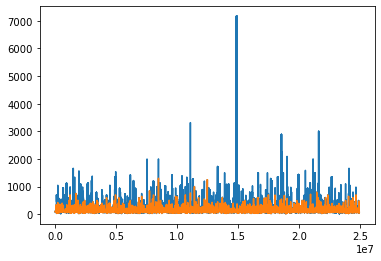

In [82]:
homes_data['price_x'].plot();
homes_data['price_y'].plot();

it seems that X is the right price as we can see variety of prices which is a fact

In [83]:
homes_data.drop(columns=['price_y'], inplace=True)

In [84]:
homes_data.rename(columns={'price_x':'price'}, inplace=True)

In [85]:
homes_data.head(2)

,listing_id,id,reviewer_id,listing_date,available,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,reviews_per_month,property_type
0,1178162,4724140,4298113,2017-08-31,1,95.0,2,1.0,1.0,1.0,1,1125,5.35,House
1,1178162,4724140,4298113,2017-08-30,1,95.0,2,1.0,1.0,1.0,1,1125,5.35,House


## Q1: What is the availability ternd of home listings?

In [86]:
avaliable_homes_count = calendar_df_cleaned.groupby('date').apply(lambda x: x.notnull().sum())[['price']]

In [87]:
avaliable_homes_count.rename({"price":"total_available_houses"},axis='columns',inplace=True)

In [88]:
avaliable_homes_count

,total_available_houses
date,
2016-09-06,570
2016-09-07,932
2016-09-08,999
2016-09-09,981
2016-09-10,956
...,...
2017-09-01,1795
2017-09-02,1798
2017-09-03,1802


In [89]:
# everyday average prices
homes_av_daily_price_df = homes_data[homes_data.price.notnull()]

In [90]:
homes_av_daily_price_df.head(1)

,listing_id,id,reviewer_id,listing_date,available,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,reviews_per_month,property_type
0,1178162,4724140,4298113,2017-08-31,1,95.0,2,1.0,1.0,1.0,1,1125,5.35,House


In [91]:
# average house price for boston everyday
homes_av_daily_price_df = homes_av_daily_price_df.groupby('listing_date').mean()[['price']]

In [92]:
homes_av_daily_price_df.head(5)

,price
listing_date,
2016-09-06,148.372215
2016-09-07,148.246723
2016-09-08,148.945661
2016-09-09,151.802226
2016-09-10,151.940769


In [93]:
homes_av_daily_price_df.rename({"price":"average_prices"},axis='columns', inplace=True)

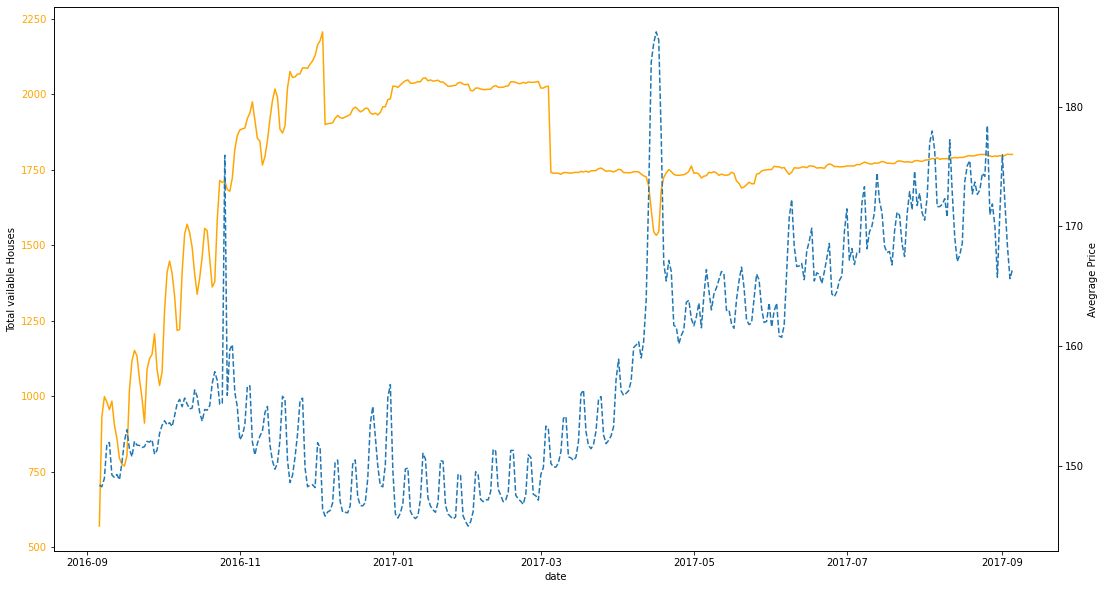

In [94]:
# plot total available houses and average prices in one figure

f, ax = plt.subplots(figsize=(18, 10))


count_plot = sns.lineplot(x = avaliable_homes_count.index, y = 'total_available_houses', 
                  data = avaliable_homes_count, color="orange")

for tl in ax.get_yticklabels():
    tl.set_color('orange')

twinx = ax.twinx()

price_plot = sns.lineplot(x = homes_av_daily_price_df.index,y = 'average_prices',
             data=homes_av_daily_price_df, ax=twinx, linestyle='--')

count_plot.set_ylabel("Total vailable Houses")

price_plot.set_ylabel('Avegrage Price');


### conclustions

House availaviltiy has no constant trend:
- from March to Septemper seems to be constant with nearly 1750 house.
- September- October it is hard to find a lot of availble houses.
- in the rest months (winter) we can find houses in easy way

The three points are logical as Boston has a good beaches; so in summer a lot of visits held on Boston which make houses full and hard to be avilable,
<a href="https://travel.usnews.com/Boston_MA/When_To_Visit/">Best Times to Visit Boston</a>.

If we compare the two plots we can find a logical conclusion. **The more the houses are availabe the less prices you can pay** 

In [95]:
homes_data['price'].max()

7163.0

In [96]:
homes_data['price'].min()

11.0

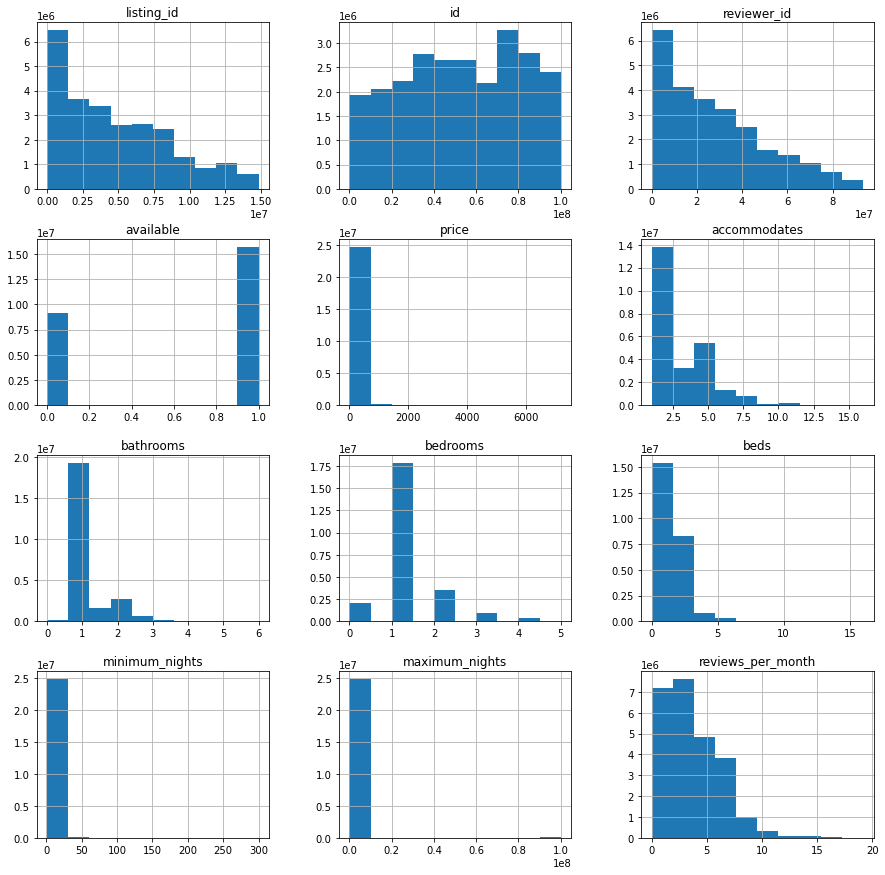

In [97]:
homes_data.hist(figsize=(15,15));

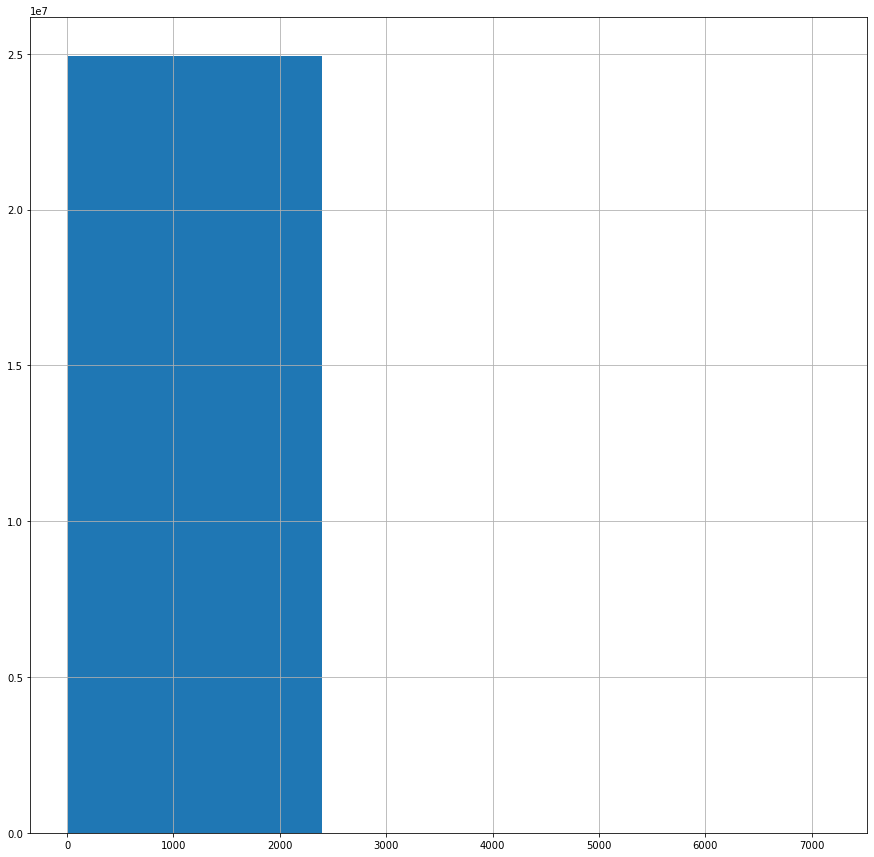

In [98]:
homes_data.price.hist(figsize=(15,15),bins=3);

In [101]:
calendar_df_cleaned.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN


In [102]:
reviews_df_cleaned.head(3)

,listing_id,id,date,reviewer_id
0,1178162,4724140,2013-05-21,4298113
1,1178162,4869189,2013-05-29,6452964
2,1178162,5003196,2013-06-06,6449554


### Q2: Which columns has effect on the price?

In [103]:
price_corr = listings_df_cleaned.corr()['price'].sort_values(ascending = False).head(5)[1:]
price_corr

accommodates    0.437756
bedrooms        0.385298
beds            0.370013
bathrooms       0.248234
Name: price, dtype: float64

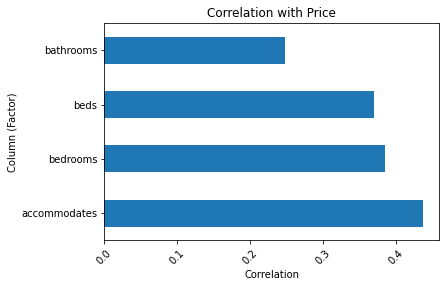

In [104]:
price_corr.plot(kind = 'barh');
plt.xticks(rotation=45)
plt.xlabel('Correlation')
plt.ylabel('Column (Factor)')
plt.title('Correlation with Price');

In [105]:
listings_df_cleaned.columns

Index(['listing_id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'reviews_per_month',
       'property_type'],
      dtype='object')

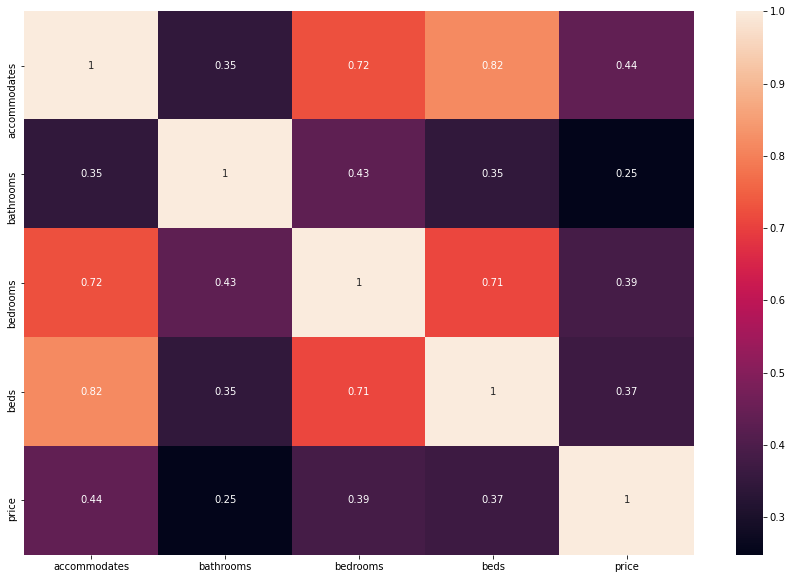

In [111]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(listings_df_cleaned[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(), annot=True);

the price depends on accommadates, bedrooms, beds, bathreooms

##### categorical columns

In [112]:
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [113]:
listings_df['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

In [124]:
pd.get_dummies(listings_df['property_type'])# Use this cell to write whatever code you need.

,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,1,0,0,0,0,0,0,0,0,0,0,0,0
3581,1,0,0,0,0,0,0,0,0,0,0,0,0
3582,1,0,0,0,0,0,0,0,0,0,0,0,0
3583,1,0,0,0,0,0,0,0,0,0,0,0,0


as 13 column will be resuldted from imputation it will lead to wrong predictions

the property_type column will be considered in our model

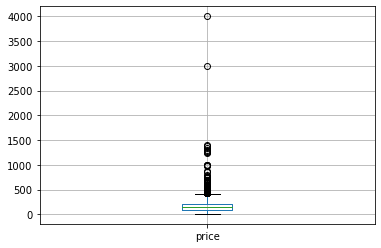

In [122]:
listings_df_cleaned.boxplot(column=['price'], return_type='axes');

The Targt value won't be fille dwith the mean as we can see a lot of outliers, so the values will fill the null columns may be wrong and lead to wrong model

In [126]:
# Drop the rows with missing response values
listings_df_cleaned = listings_df_cleaned.dropna(subset=['price'], axis=0)

In [127]:
listings_df_cleaned.head(5)

,listing_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,property_type
0,12147973,4,1.5,2.0,3.0,250.0,2,1125,NaN,House
1,3075044,2,1.0,1.0,1.0,65.0,2,15,1.30,Apartment
2,6976,2,1.0,1.0,1.0,65.0,3,45,0.47,Apartment
3,1436513,4,1.0,1.0,2.0,75.0,1,1125,1.00,House
4,7651065,2,1.5,1.0,2.0,79.0,2,31,2.25,House


In [128]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())

In [129]:
#Split into explanatory and response variable
# target
y = listings_df_cleaned['price']
# features
x = listings_df_cleaned[['accommodates', 'bathrooms', 'bedrooms', 'beds']]

In [130]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  3585 non-null   int64  
 1   bathrooms     3571 non-null   float64
 2   bedrooms      3575 non-null   float64
 3   beds          3576 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 140.0 KB


In [132]:
# fill nulls with the mean
x = x.apply(fill_mean, axis=0)

In [133]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  3585 non-null   int64  
 1   bathrooms     3585 non-null   float64
 2   bedrooms      3585 non-null   float64
 3   beds          3585 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 140.0 KB


In [134]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [135]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [136]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [137]:
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [138]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.23186453014582498.  The rsquared on the test data was 0.1694187521637126.


## Top Reviewers

In [139]:
reviews_df_cleaned.head(2)

,listing_id,id,date,reviewer_id
0,1178162,4724140,2013-05-21,4298113
1,1178162,4869189,2013-05-29,6452964


In [140]:
top_reviewers = reviews_df_cleaned.reviewer_id.value_counts()[:10].to_dict()

In [141]:
top_reviewers

{12096536: 37,
 40651868: 25,
 46024609: 22,
 52667131: 21,
 39441871: 18,
 18607361: 18,
 30824856: 16,
 11338714: 15,
 61663856: 13,
 21142093: 13}

In [142]:
top_reviewers

{12096536: 37,
 40651868: 25,
 46024609: 22,
 52667131: 21,
 39441871: 18,
 18607361: 18,
 30824856: 16,
 11338714: 15,
 61663856: 13,
 21142093: 13}

In [149]:
names = []
for k in top_reviewers.keys():
    names.append(helpers.get_reviewer_name(k,reviews_df))

In [150]:
names

['Marie',
 'Harry',
 'Joseph',
 'Richard',
 'Doron',
 'Frank (And Meridith)',
 'Esther',
 'Tom',
 'Yechiel',
 'Donna']

In [151]:
counts = list(top_reviewers.values())

In [152]:
counts

[37, 25, 22, 21, 18, 18, 16, 15, 13, 13]

In [153]:
top_reviewer_dict = {'reviewer_name': names, 'count': counts }

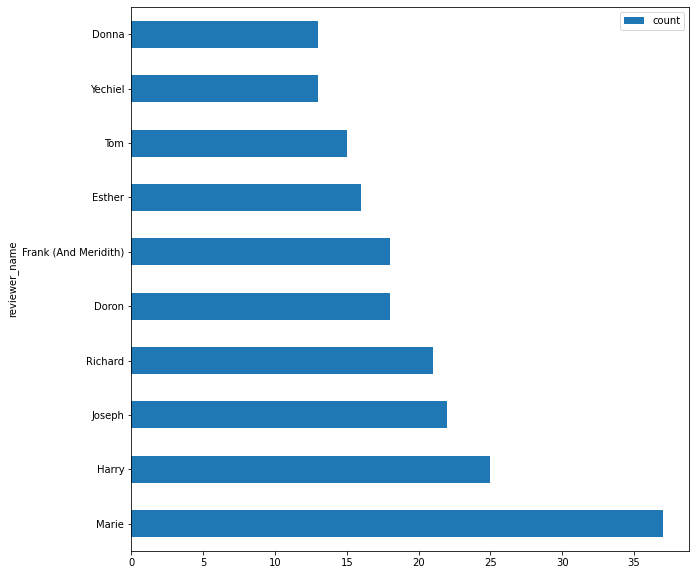

In [155]:
pd.DataFrame(top_reviewer_dict).set_index('reviewer_name').plot(kind='barh', figsize=(10,10));